In [21]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# load datasets
data_2d = pd.read_csv('data_2d.csv')


mnist = pd.read_csv('mnist.csv')

data_2d
data_2d

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482
...,...,...,...
194,1.0,0.629144,4.378584
195,1.0,-0.723824,5.361801
196,1.0,1.346107,2.333476
197,1.0,3.608219,3.411546


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

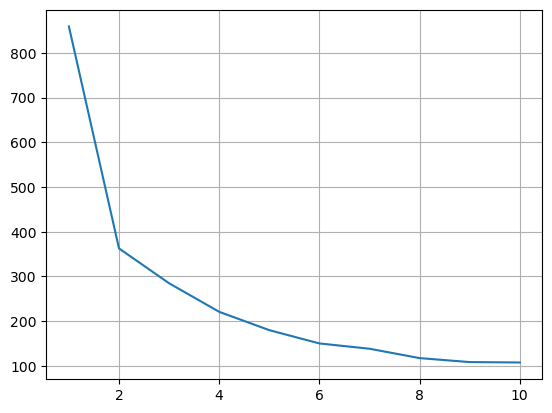

In [23]:
inertia_d = []
for i in range(1, 11):
    claster = KMeans(n_clusters=i, n_init='auto').fit(data_2d)
    inertia_d.append(claster.inertia_)
plt.grid()
plt.plot(range(1, 11), inertia_d)
plt.show()

In [24]:
# Вилучення першого стовпця (мітки класу)
data_2d_features = data_2d.iloc[:, 1:]

model_d = KMeans(n_clusters=2, n_init = 'auto').fit(data_2d_features)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

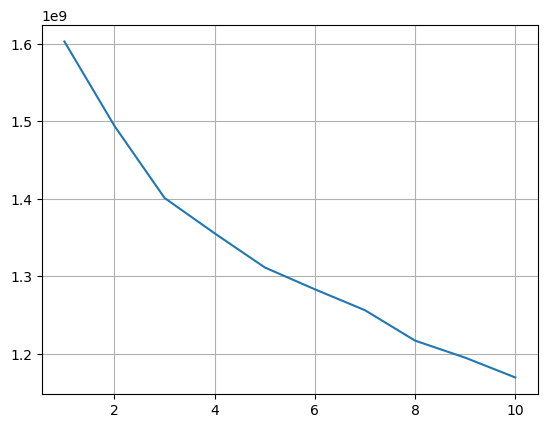

In [12]:
inertia_mnist = []
for i in range(1, 11):
    claster = KMeans(n_clusters=i, n_init='auto').fit(data_mnist)
    inertia_mnist.append(claster.inertia_)
plt.grid()
plt.plot(range(1, 11), inertia_mnist)
plt.show()

In [17]:
model_mnist = KMeans(n_clusters=3, n_init = 'auto').fit(mnist)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


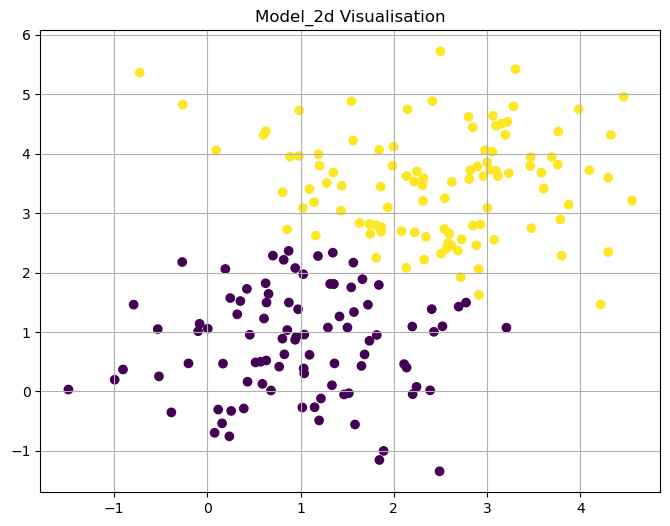

In [29]:
# Візуалізація результатів кластеризації
label = model_d.labels_
plt.figure(figsize=[8, 6])
plt.grid()
plt.scatter(data_2d['-7.687164597386728637e-01'], data_2d['4.608603078297135447e-01'], c=label)
plt.title('Model_2d Visualisation')
plt.show()

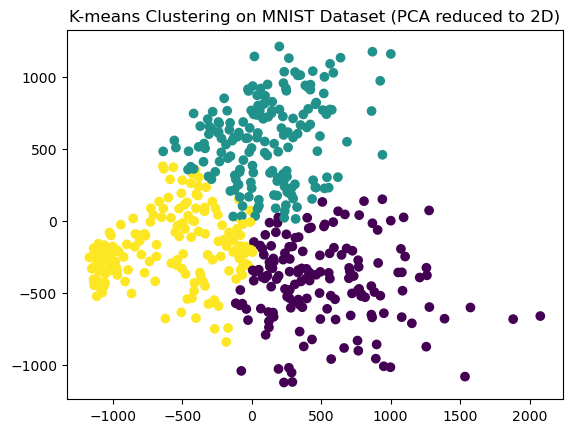

In [30]:
# Використання PCA для зменшення розмірності даних до 2D
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=model_mnist.labels_)
plt.title('K-means Clustering on MNIST Dataset (PCA reduced to 2D)')
plt.show()